# Análise Inicial dos Dados
### Motivação  
- Fazer uma análise inicial do estado dos dados no dataset principal de treino.

### Conteúdo
- Análise de dados faltentes, duplicados e modelagem inicial para teste.

### Conclusão
- Há muitos dados faltantes, e o target está extremamente desbalanceado.

## Imports e Carregamento dos Datasets

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

In [2]:
data = pd.read_csv('dados/application_train.csv')

## Tratamento

In [43]:
# removendo colunas com mais de 30% dos dados faltantes

treino = data.dropna(axis=1, thresh=172000)
treino

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
246004,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246005,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,236776,1,Cash loans,M,Y,N,3,202500.0,204858.0,17653.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
no_na.corr().sort_values(by='TARGET', ascending=False)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,-0.002557,1.000000,0.019246,-0.002286,-0.031103,-0.014100,-0.040060,-0.036342,0.079414,-0.044862,...,-0.008746,-0.002312,-0.000758,0.003712,0.000833,0.003549,-0.000118,-0.013337,-0.001611,0.021280
DAYS_BIRTH,-0.002144,0.079414,0.332396,0.025419,-0.055686,0.009139,-0.053780,-0.029180,1.000000,-0.616375,...,0.045166,0.003374,0.010069,0.024602,0.006319,0.002327,0.000077,0.002281,-0.015807,-0.073086
REGION_RATING_CLIENT_W_CITY,0.000899,0.061518,0.022913,-0.083806,-0.110395,-0.141656,-0.111483,-0.532145,0.007877,0.034103,...,-0.011384,-0.001174,0.001112,-0.000103,0.005646,-0.000477,0.002576,-0.068635,0.006293,0.010569
REGION_RATING_CLIENT,0.001137,0.059170,0.023448,-0.078316,-0.101041,-0.128411,-0.102948,-0.533315,0.008758,0.032373,...,-0.010073,-0.001498,0.000882,-0.000328,0.005830,-0.000864,0.003224,-0.070274,0.007150,0.011730
DAYS_LAST_PHONE_CHANGE,0.000739,0.054471,-0.006417,-0.016981,-0.074416,-0.063573,-0.077175,-0.044811,0.083575,0.022588,...,0.047923,0.006414,0.011176,0.007963,-0.000314,0.002001,-0.003071,-0.042034,-0.001761,-0.113823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REGION_POPULATION_RELATIVE,-0.000005,-0.036342,-0.022819,0.068520,0.101197,0.119601,0.104671,1.000000,-0.029180,-0.004443,...,0.012261,0.002148,0.000558,0.000983,-0.003186,-0.001367,-0.003014,0.080857,-0.001373,0.001982
AMT_GOODS_PRICE,0.000315,-0.040060,-0.002142,0.145293,0.987024,0.774900,1.000000,0.104671,-0.053780,-0.062846,...,0.032844,0.020171,0.033589,-0.013603,-0.003033,0.004520,-0.002510,0.056240,0.018360,-0.052101
DAYS_EMPLOYED,0.001836,-0.044862,-0.239866,-0.058849,-0.064905,-0.102962,-0.062846,-0.004443,-0.616375,1.000000,...,-0.040025,-0.010516,-0.010067,-0.007813,-0.005171,-0.001137,0.002307,-0.035900,0.020817,0.050895
EXT_SOURCE_2,0.001310,-0.160978,-0.017523,0.054826,0.131836,0.126699,0.139851,0.199326,-0.091906,-0.019764,...,0.001787,0.003890,0.003215,-0.006820,-0.004183,-0.000231,-0.000171,0.051359,-0.003711,-0.021358


#### Pipeline

- Imputer dos valores faltantes
- One hot enconding dos categóricos
- Padronizar os dados

In [56]:
X = treino.select_dtypes(np.number).drop('TARGET', axis=1).dropna(axis=1)
y = treino['TARGET']

X.shape, y.shape

((246008, 44), (246008,))

Fold 1:
Accuracy: 0.7189371120568759
roc_auc_score: 0.5386353190251661
Fold 2:
Accuracy: 0.7235101154835799
roc_auc_score: 0.5332516380603372
Fold 3:
Accuracy: 0.7222262871637277
roc_auc_score: 0.537582733317324


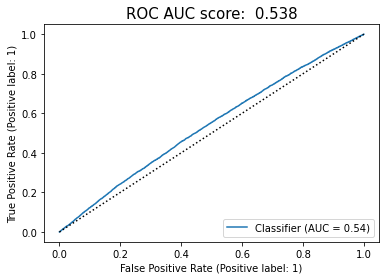

In [82]:
'''
n_splits: integer - number of folds created

'''


kf = KFold(n_splits=3)

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    X_train, y_train = X.loc[train_idx], y[train_idx]  
    X_val, y_val = X.loc[val_idx], y[val_idx] 

    X_train_oversampled, y_train_oversampled = SMOTE(k_neighbors=3, n_jobs=-1).fit_sample(X_train, y_train)

    X_num_names = X_train_oversampled.select_dtypes(np.number).columns.tolist()
    X_cat_names = X_train_oversampled.drop(X_num_names, axis=1).columns.tolist()


    ct = ColumnTransformer([
    ('ohe', OneHotEncoder(), X_cat_names),
    ('scaler', StandardScaler(), X_num_names)
    ])

    clf = Pipeline([
        ('preprocessor', ct), 
        ('classifier', AdaBoostClassifier())
    ])


    clf.fit(X_train_oversampled, y_train_oversampled)  
    y_pred = clf.predict(X_val)
    y_proba = clf.predict_proba(X_val)[::,1]

    print(f'Fold {fold}:')
    print(f'Accuracy: {clf.score(X_val, y_val)}')
    print(f'roc_auc_score: {roc_auc_score(y_val, y_proba)}')
    
disp = RocCurveDisplay.from_predictions(y_val, y_proba)
disp.ax_.set_title(f'ROC AUC score:  {round(roc_auc_score(y_val, y_proba), 3)}', fontsize=15)
x = np.linspace(0, 1, 100)
plt.plot(x, x, ls=":", color='black')
plt.show()

In [77]:
y_train_oversampled.value_counts()

0    150679
1    150679
Name: TARGET, dtype: int64

In [78]:
y_train.value_counts()

0    150679
1     13327
Name: TARGET, dtype: int64